In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from sklearn.cluster import KMeans
from skimage.feature import hog
from skimage import exposure
from skimage.measure import label

In [3]:
All_files = glob.glob("Animals/*/*.*")

In [4]:
image = []
for i in All_files:
    lst = []
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Create Image Feature
    # Bluring image to reduce noise
    blur = cv2.GaussianBlur(img,(5,5),0) #Gaussian Filtering
    # Calculate HoG of image
    fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    lst.append(img)
    lst.append(blur)
    lst.append(fd)
    lst.append(hog_image)
    image.append(lst)
    


C:\Users\ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'histogram')

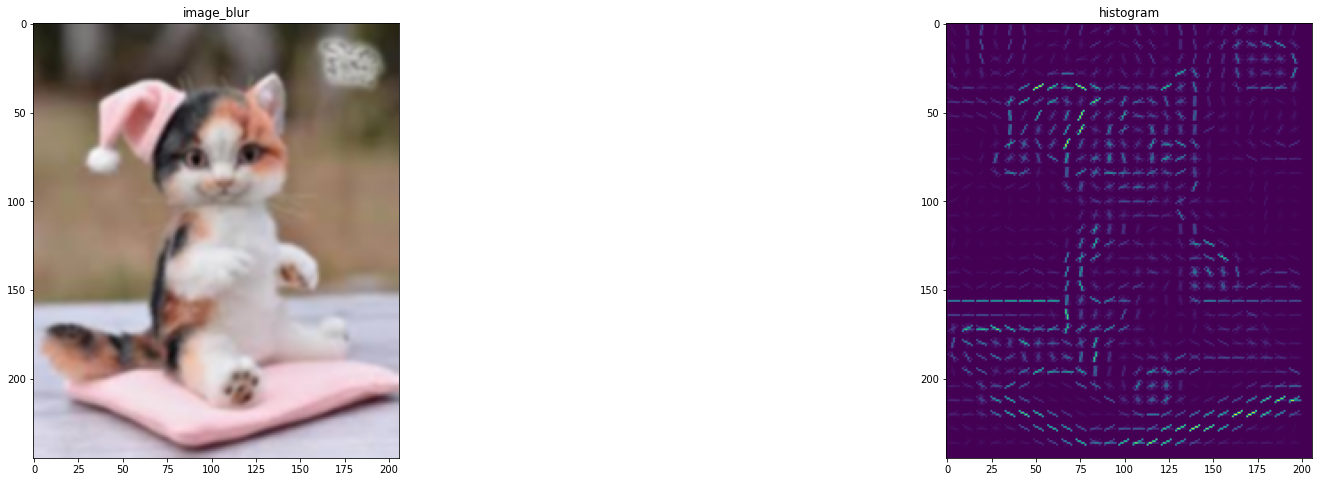

In [5]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.imshow(image[0][1])
plt.title('image_blur')
plt.subplot(1,2,2)
plt.imshow(image[0][3])
plt.title('histogram')

In [6]:
#Define block size for subimage
Block_size = (40,20) # ลองอย่างน้อย 3 ค่า เช่น (40,20), (40, 30), (60, 20), (60,30), (60,40)
# Define stride (ระยะขยับ pixel เพื่อทำ sliding window เพื่อคำนวณ HoG)
Stride = (10, 10)

#image
image = cv2.imread("Animals/Cats/cat2.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)

(1400, 1400, 3)


In [7]:
# Define Sliding window position of row, column (Top left position)
posRow = np.arange(0, image.shape[0] - Block_size[0]+1, Stride[0])
posCol = np.arange(0,image.shape[1] - Block_size[1]+1, Stride[1])

print(f"posRow = {posRow} posCol = {posCol}")

posRow = [   0   10   20   30   40   50   60   70   80   90  100  110  120  130
  140  150  160  170  180  190  200  210  220  230  240  250  260  270
  280  290  300  310  320  330  340  350  360  370  380  390  400  410
  420  430  440  450  460  470  480  490  500  510  520  530  540  550
  560  570  580  590  600  610  620  630  640  650  660  670  680  690
  700  710  720  730  740  750  760  770  780  790  800  810  820  830
  840  850  860  870  880  890  900  910  920  930  940  950  960  970
  980  990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110
 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250
 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360] posCol = [   0   10   20   30   40   50   60   70   80   90  100  110  120  130
  140  150  160  170  180  190  200  210  220  230  240  250  260  270
  280  290  300  310  320  330  340  350  360  370  380  390  400  410
  420  430  440  450  460  470  480  490  500  510  520  530  540  550
  

In [8]:
# Create subimage feature
# Calculate HoG of each subimage in Sliding window
hogfeatures = []
for i in range(len(posRow)):
    for j in range(len(posCol)):
        startH = posRow[ i ]
        endH = posRow[i] + Block_size[0]
        startW = posCol[ j ]
        endW = posCol[j] + Block_size[1]
        #print(f"startH = {startH} endH = {endH} startW = {startW} endW = {endW}")
        subImg = image[startH:endH,startW:endW,:]
        blur = cv2.GaussianBlur(subImg,(5,5),0) #Gaussian Filtering
        fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(2, 2), visualize=True, multichannel=True)
        #print(hog_image)
        hogfeatures.append(fd)


Text(0.5, 1.0, 'histogram')

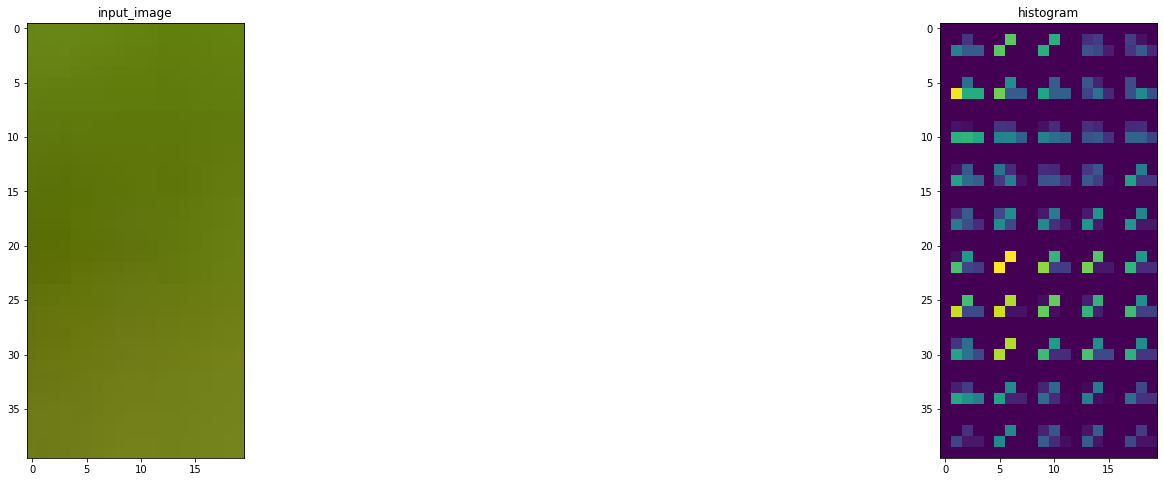

In [9]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.imshow(subImg)
plt.title('input_image')
plt.subplot(1,2,2)
plt.imshow(hog_image)
plt.title('histogram')

In [10]:
print(hogfeatures)

[array([0.        , 0.        , 0.        , ..., 0.09060261, 0.        ,
       0.        ]), array([0.30756234, 0.        , 0.        , ..., 0.2729247 , 0.        ,
       0.        ]), array([0.        , 0.        , 0.23440361, ..., 0.15357378, 0.        ,
       0.        ]), array([0.3301193, 0.       , 0.3301193, ..., 0.       , 0.       ,
       0.       ]), array([0.19583181, 0.        , 0.28423734, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.3562873, 0.       , 0.3562873, ..., 0.       , 0.       ,
       0.       ]), array([0.14391842, 0.        , 0.        , ..., 0.41302329, 0.        ,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.14808722, 0.        ,
       0.        ]), array([0.        , 0.        , 0.08825056, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.3615684, 0.       , 0.       , ..., 0.       , 0.  

In [11]:
print(np.isnan(hogfeatures).any())
hogfeatures = np.where(np.isnan(hogfeatures), 0, hogfeatures)

False


In [12]:
#K-mean Clustering
N = 2
kmeans = KMeans(n_clusters=N, random_state=0)
clusters = kmeans.fit_predict(hogfeatures)

In [13]:
# Reshape clusterID result to Grid
print(f"posRow = {len(posRow)} posCol = {len(posCol)}")
cluster_array = clusters.reshape(len(posRow),len(posCol))

posRow = 137 posCol = 139


In [14]:
# View cluster vector Result
clustervector = []
for i in range(len(clusters)):
    if(clusters[i] == 1):
        clustervector.append(i)

[0 0 0 ... 1 1 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]]
19042
549


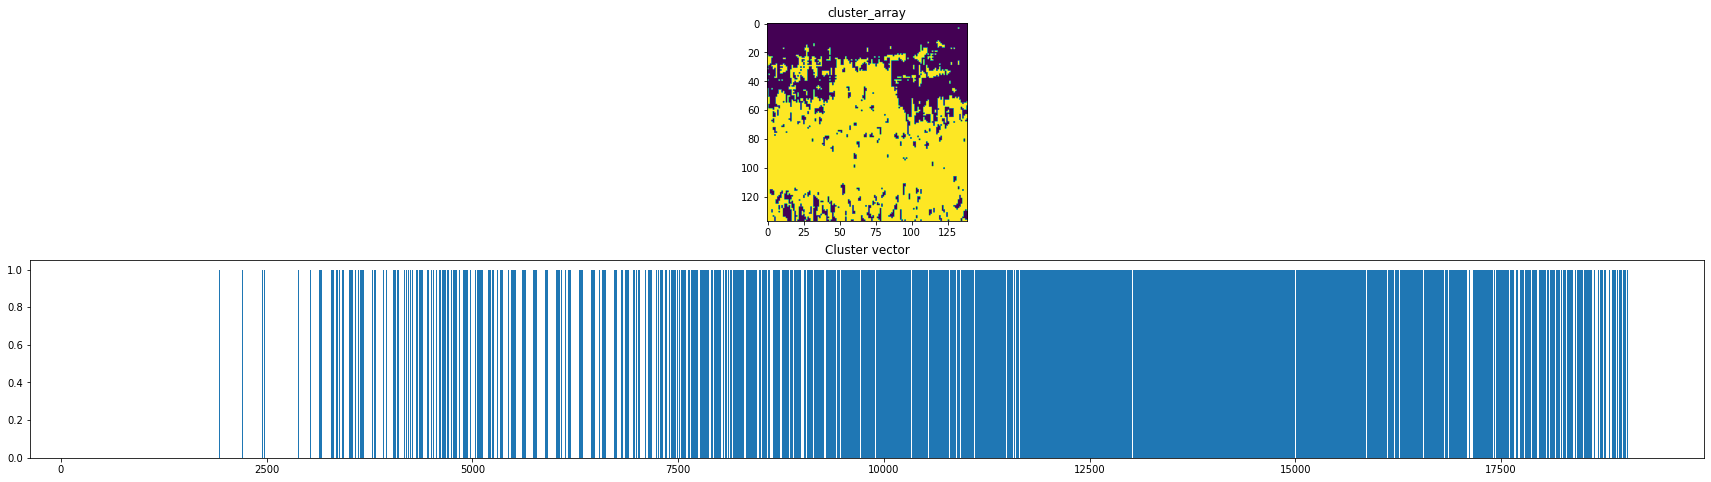

In [15]:
plt.figure(figsize=(30,8))
plt.subplot(2,1,1)
plt.imshow(cluster_array)
plt.title('cluster_array')
plt.subplot(2, 1, 2)
plt.title('Cluster vector')
plt.hist(clustervector, bins=max(clustervector)-min(clustervector)+1)

print(clusters)
print(cluster_array)
print(max(clustervector))
print(min(clustervector))

In [32]:
# ReAssign Label in case of multiple ROIs with the same clusterID
all_labels = label(cluster_array)
# Define bounding box parameter
Color = (255,0,0)
Thickness = 3

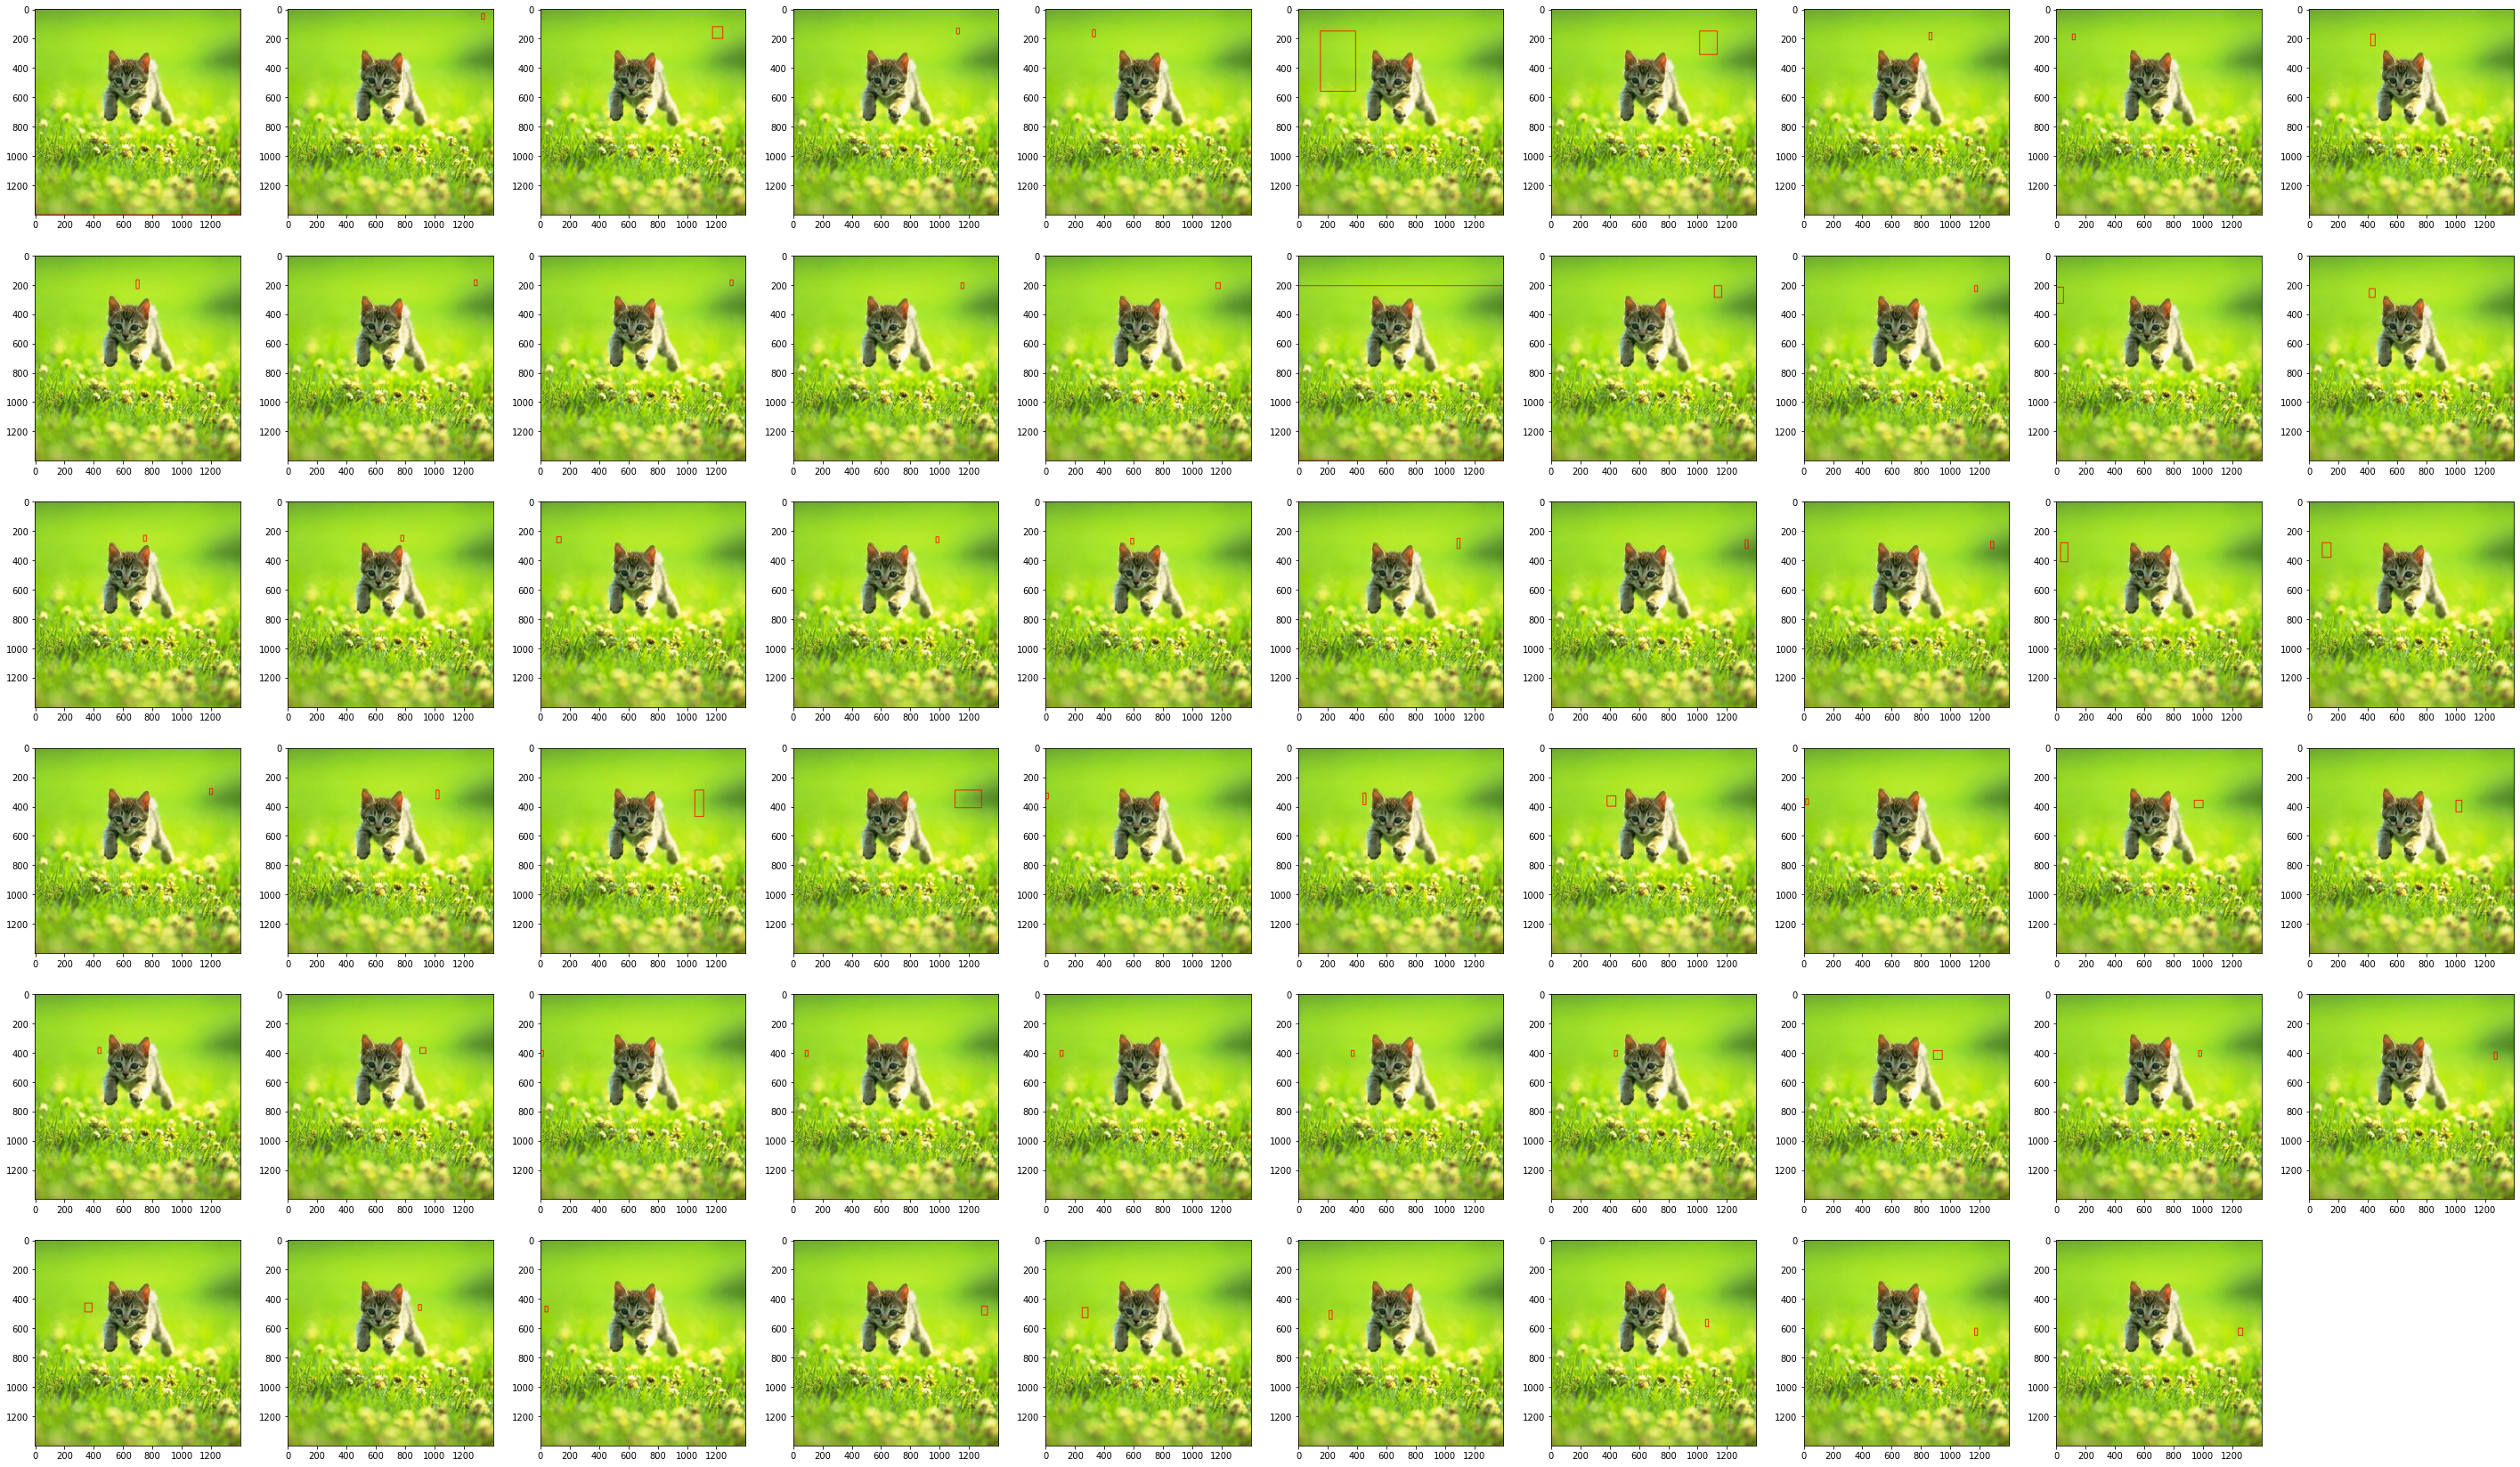

In [33]:
# ROI bounding box
square = 10
ix = 1
plt.figure(figsize=(50,50))

nClass = np.unique(all_labels)
for i in nClass:
    #calculate from grid to actual position
    objPos = np.argwhere(all_labels == i)
    startBlockH = objPos[:,0].min()
    endBlockH = objPos[:,0].max()
    startBlockW = objPos[:,1].min()
    endBlockW = objPos[:,1].max()
    startF = (posCol[startBlockW], posRow[startBlockH])
    endF =(posCol[endBlockW]+Block_size[1], posRow[endBlockH]+Block_size[0])
    #print(f"startF = {startF} , endF = {endF}")
    # draw regtangle boundary
    ROI_bounding_img = cv2.rectangle(image.copy(), startF, endF, Color, Thickness)
    ax = plt.subplot(square, square, ix)
    plt.imshow(ROI_bounding_img)
    ix += 1

In [34]:
print(all_labels)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [15 15 15 ...  0  0  0]
 [15 15 15 ... 15  0  0]
 [15 15 15 ... 15 15 15]]
